In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.9 MB/s eta 0:00:00


In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 53.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sweetviz as sv
#import dataprep as dp
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
import pickle

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from PIL import Image
import warnings
from tqdm import tqdm, trange
import optuna

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

for lib in [pd, sk, sns, sv, optuna, tf, keras]:
    print(f"Using {lib.__name__} {lib.__version__}")

RANDOM_SEED = 5
PATH_TO_QAE_CLASS = "../../Quantized Autoencoders (QAE)/Final Versions"

"""
# Import the QAE class
sys.path.append(os.path.abspath(PATH_TO_QAE_CLASS))
from QAE import QAE
print("INFO: QAE class successfully imported.")
"""

df = pd.read_csv("/content/drive/MyDrive/data_ciciot2023/0.1percent_2classes.csv")

tf.random.set_seed(RANDOM_SEED)

training_df, validation_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

print("Training size:", training_df.shape[0])
print("Validation size:", validation_df.shape[0])

Using pandas 2.2.2
Using sklearn 1.6.1
Using seaborn 0.13.2
Using sweetviz 2.3.1
Using optuna 4.4.0
Using tensorflow 2.19.0
Using keras 3.10.0
Training size: 3734922
Validation size: 933731


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668653 entries, 0 to 4668652
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   header_length    int64  
 2   protocol_type    object 
 3   duration         float64
 4   rate             int64  
 5   srate            int64  
 6   drate            float64
 7   fin_flag_number  bool   
 8   syn_flag_number  bool   
 9   rst_flag_number  bool   
 10  psh_flag_number  bool   
 11  ack_flag_number  bool   
 12  ece_flag_number  bool   
 13  cwr_flag_number  bool   
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        int64  
 17  urg_count        int64  
 18  rst_count        int64  
 19  http             bool   
 20  https            bool   
 21  dns              bool   
 22  telnet           bool   
 23  smtp             bool   
 24  ssh              bool   
 25  irc              bool   
 26  tcp              bool   
 27  udp         

In [ ]:
null_counts = df.isnull().sum()


cols_with_null = null_counts[null_counts > 0]

print("Các cột có giá trị null hoặc rỗng:")
print(cols_with_null)


Các cột có giá trị null hoặc rỗng:
Series([], dtype: int64)


In [ ]:
print(df.columns)
print(df['benign'].unique())


Index(['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate',
       'srate', 'drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'dns', 'telnet',
       'smtp', 'ssh', 'irc', 'tcp', 'udp', 'dhcp', 'arp', 'icmp', 'ipv', 'llc',
       'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number',
       'radius', 'covariance', 'variance', 'weight', 'magnitude', 'benign'],
      dtype='object')
[False  True]


In [ ]:
def convert_bool_to_float(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(float)
    return df


In [ ]:
training_df = convert_bool_to_float(training_df)
validation_df = convert_bool_to_float(validation_df)


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3734922 entries, 1279519 to 2115790
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   header_length    int64  
 2   protocol_type    object 
 3   duration         float64
 4   rate             int64  
 5   srate            int64  
 6   drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        int64  
 17  urg_count        int64  
 18  rst_count        int64  
 19  http             float64
 20  https            float64
 21  dns              float64
 22  telnet           float64
 23  smtp             float64
 24  ssh              float64
 25  irc              float64
 26  tcp              float64
 27  udp        

# Preprocessing and Feature Engineering

In [ ]:
# Save "clean" versions of the sets
tr_df = training_df
val_df = validation_df

In [ ]:
# Drop unbalanced features and unclear features
unbalanced_feat = ["drate", "smtp", "irc", "telnet", "ssh", "dhcp", "arp", "ipv", "llc", "dns", "cwr_flag_number", "ece_flag_number", "rst_flag_number", "syn_flag_number"]
unclear_feat = ["protocol_type", "tot_size"]
feat2drop = unbalanced_feat + unclear_feat

training_df.drop(feat2drop, axis=1, inplace=True)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3734922 entries, 1279519 to 2115790
Data columns (total 31 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   header_length    int64  
 2   duration         float64
 3   rate             int64  
 4   srate            int64  
 5   fin_flag_number  float64
 6   psh_flag_number  float64
 7   ack_flag_number  float64
 8   ack_count        float64
 9   syn_count        float64
 10  fin_count        int64  
 11  urg_count        int64  
 12  rst_count        int64  
 13  http             float64
 14  https            float64
 15  tcp              float64
 16  udp              float64
 17  icmp             float64
 18  tot_sum          float64
 19  min              float64
 20  max              float64
 21  avg              float64
 22  std              float64
 23  iat              float64
 24  number           float64
 25  radius           float64
 26  covariance       float64
 27  variance   

In [ ]:
training_df["is_benign"] = training_df["benign"]
training_df.drop("benign", axis=1, inplace=True)

validation_df["is_benign"] = validation_df["benign"]
validation_df.drop("benign", axis=1, inplace=True)

In [ ]:
X_train, X_valid = training_df.drop("is_benign", axis=1), validation_df.drop("is_benign", axis=1)
y_train, y_valid = validation_df["is_benign"], validation_df["is_benign"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
# Plot the scaled weight
training_df["scaled_weight2"] = scaler.fit_transform(training_df[["weight"]])**2
#sns.kdeplot(data=training_df[:10000], x="scaled_weight2", hue="benign")

In [ ]:
# Find best threshold with Optuna

def objective(trial):
    threshold = trial.suggest_float('threshold', min(training_df['scaled_weight2']), max(training_df['scaled_weight2']))
    predictions = ((training_df['ack_flag_number'] == 1) | (training_df['scaled_weight2'] > threshold)).astype(int)
    f1 = f1_score(training_df['is_benign'], predictions)
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_threshold = study.best_params['threshold']
best_f1_score = study.best_value

print(f"Best threshold: {best_threshold}")
print(f"Best F1-score: {best_f1_score}")

[I 2025-08-09 15:52:21,386] A new study created in memory with name: no-name-b258c8b4-33d3-4e48-b5d4-797988bc6978
[I 2025-08-09 15:52:23,595] Trial 0 finished with value: 0.2978223222569555 and parameters: {'threshold': 3.049577870076634}. Best is trial 0 with value: 0.2978223222569555.
[I 2025-08-09 15:52:25,131] Trial 1 finished with value: 0.2978610070180141 and parameters: {'threshold': 9.2612234757009}. Best is trial 1 with value: 0.2978610070180141.
[I 2025-08-09 15:52:26,191] Trial 2 finished with value: 0.27130077083390214 and parameters: {'threshold': 25.768629338705587}. Best is trial 1 with value: 0.2978610070180141.
[I 2025-08-09 15:52:27,274] Trial 3 finished with value: 0.27130077083390214 and parameters: {'threshold': 25.614878211742933}. Best is trial 1 with value: 0.2978610070180141.
[I 2025-08-09 15:52:28,380] Trial 4 finished with value: 0.2975306319907956 and parameters: {'threshold': 1.0395493216539262}. Best is trial 1 with value: 0.2978610070180141.
[I 2025-08-09

Best threshold: 20.60870516927072
Best F1-score: 0.29794693142693274


In [ ]:
threshold=best_threshold # found with optuna

# Classify samples based on the threshold
predictions = ((training_df['ack_flag_number'] == 1) | (training_df['scaled_weight2'] > threshold)).astype(int)

# Calculate recall and precision
recall = recall_score(training_df['is_benign'], predictions)
precision = precision_score(training_df['is_benign'], predictions)

print("Recall (benign traffic misclassified as attack):", recall)
print("Precision (malicious traffic misclassified as benign):", precision)

tr_sv_thr = training_df

# Identify misclassified samples
misclassified = training_df[predictions != training_df['is_benign']]
misclassified.shape

Recall (benign traffic misclassified as attack): 0.999977219399959
Precision (malicious traffic misclassified as benign): 0.175052191442398


(413729, 32)

<Axes: xlabel='scaled_weight2', ylabel='variance'>

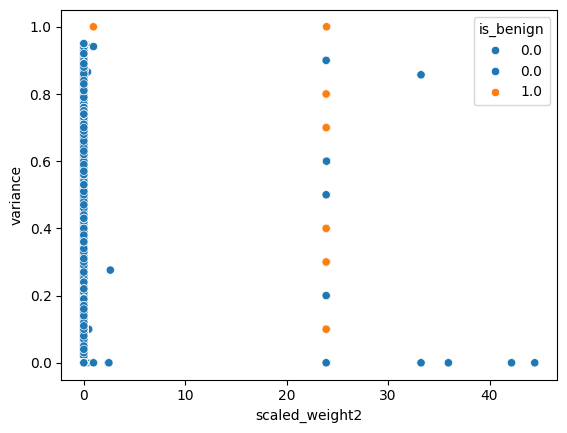

In [ ]:
sns.scatterplot(x=misclassified['scaled_weight2'][:10000], y=misclassified['variance'][:10000], hue=misclassified['is_benign'][:10000])
sns.scatterplot(x=training_df['scaled_weight2'][:10000], y=training_df['variance'][:10000], hue=training_df['is_benign'][:10000])

<Axes: xlabel='scaled_weight2', ylabel='duration'>

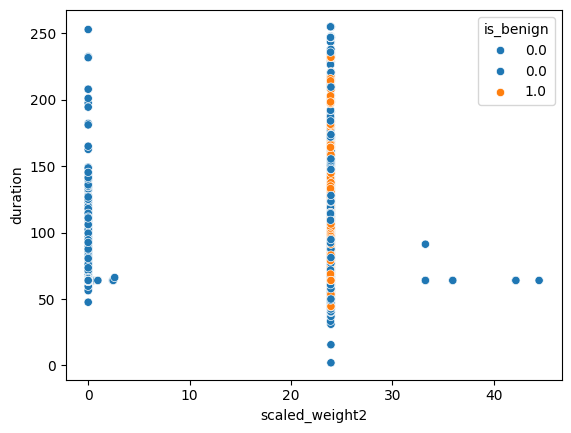

In [ ]:
sns.scatterplot(x=misclassified['scaled_weight2'][:10000], y=misclassified['duration'][:10000], hue=misclassified['is_benign'][:10000])
sns.scatterplot(x=training_df['scaled_weight2'][:10000], y=training_df['duration'][:10000], hue=training_df['is_benign'][:10000])

In [ ]:
# Find best thresholds with Optuna

def objective(trial):
    # Suggest thresholds for the two features
    threshold1 = trial.suggest_float('threshold1', min(training_df['scaled_weight2']), max(training_df['scaled_weight2']))
    threshold2 = trial.suggest_float('threshold2', min(training_df['duration']), max(training_df['duration']))

    # Correctly apply the logical condition using parentheses
    predictions = ((training_df['scaled_weight2'] > threshold1) & (training_df['duration'] > threshold2)).astype(int)

    # Calculate the F1-score based on the predictions
    f1 = f1_score(training_df['is_benign'], predictions)
    return f1

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Retrieve the best thresholds and the best F1-score
best_threshold1 = study.best_params['threshold1']
best_threshold2 = study.best_params['threshold2']
best_f1_score = study.best_value

# Print the results
print(f"Best threshold1 for 'scaled_weight2': {best_threshold1}")
print(f"Best threshold2 for 'duration': {best_threshold2}")
print(f"Best F1-score: {best_f1_score}")

[I 2025-08-09 15:52:45,337] A new study created in memory with name: no-name-bfba5dee-e8c8-4f52-a687-fe72ce92159c
[I 2025-08-09 15:52:47,198] Trial 0 finished with value: 0.00013651100619987486 and parameters: {'threshold1': 43.23034451703274, 'threshold2': 54.16165168669584}. Best is trial 0 with value: 0.00013651100619987486.
[I 2025-08-09 15:52:50,276] Trial 1 finished with value: 0.3360882988306702 and parameters: {'threshold1': 21.945426481408294, 'threshold2': 156.5495652879962}. Best is trial 1 with value: 0.3360882988306702.
[I 2025-08-09 15:52:52,050] Trial 2 finished with value: 0.3943199809681627 and parameters: {'threshold1': 21.326342393255434, 'threshold2': 141.4245977909046}. Best is trial 2 with value: 0.3943199809681627.
[I 2025-08-09 15:52:53,755] Trial 3 finished with value: 0.4000130212572024 and parameters: {'threshold1': 10.788189978729761, 'threshold2': 138.26174476127238}. Best is trial 3 with value: 0.4000130212572024.
[I 2025-08-09 15:52:55,432] Trial 4 finish

Best threshold1 for 'scaled_weight2': 4.3135577620513805
Best threshold2 for 'duration': 99.8812640448528
Best F1-score: 0.5485364493496051


In [ ]:
significant_features = ["variance", "duration", "https", "tcp", "tot_sum", "ack_flag_number"]
features_to_scale_and_square = ["weight", "iat", "number"]

for feat in training_df.columns:
    if feat not in significant_features + features_to_scale_and_square + ["is_benign"]:
        training_df.drop(feat, axis=1, inplace=True)

for feat in features_to_scale_and_square:
    training_df[f"scaled_{feat}2"] = scaler.fit_transform(training_df[[feat]])**2
    if feat in training_df:
        training_df.drop(feat, axis=1, inplace=True)
    else:
        print(f"{feat} was not part of training_df.")

for feat in significant_features:
    training_df[f"scaled_{feat}"] = scaler.fit_transform(training_df[[feat]])
    if feat in training_df:
        training_df.drop(feat, axis=1, inplace=True)
    else:
        print(f"{feat} was not part of training_df.")

training_df.describe()

,is_benign,scaled_weight2,scaled_iat2,scaled_number2,scaled_variance,scaled_duration,scaled_https,scaled_tcp,scaled_tot_sum,scaled_ack_flag_number
count,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06
mean,2.350625e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.510605e-16,2.084949e-15,-2.279872e-17,1.120075e-16,3.910730e-17,7.630646e-17
std,1.515048e-01,4.791401e+00,4.776166e+00,4.821996e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,3.910391e-06,1.443430e-06,4.204228e-06,-4.138298e-01,-4.731379e+00,-2.413268e-01,-1.160642e+00,-4.855105e-01,-3.753446e-01
25%,0.000000e+00,3.910391e-06,2.209163e-05,4.204228e-06,-4.138298e-01,-1.676907e-01,-2.413268e-01,-1.160642e+00,-3.003285e-01,-3.753446e-01
50%,0.000000e+00,3.910391e-06,7.767669e-05,4.204228e-06,-4.138298e-01,-1.676907e-01,-2.413268e-01,8.615921e-01,-2.842257e-01,-3.753446e-01
75%,0.000000e+00,3.910391e-06,1.161128e-04,4.204228e-06,-7.058573e-02,-1.676907e-01,-2.413268e-01,8.615921e-01,-2.840187e-01,-3.753446e-01
max,1.000000e+00,4.445521e+01,2.453723e+01,1.075527e+02,3.876721e+00,1.345207e+01,4.143759e+00,8.615921e-01,3.292628e+01,2.664218e+00


In [ ]:
import numpy as np

# Check for non-numeric values
print("Non-numeric values in 'benign':")
print(training_df[~training_df["is_benign"].apply(lambda x: isinstance(x, (int, float, np.integer, np.floating)))])

# Check for NaN values
if training_df["is_benign"].isnull().any():
    print("NaN values found in 'benign'. Filling with 0.")
    training_df["is_benign"] = training_df["is_benign"].fillna(0)

# Convert to integer, ensuring there are no type issues
training_df["is_benign"] = training_df["is_benign"].astype(int)

# Display the DataFrame info to confirm the change
training_df.info()


Non-numeric values in 'benign':
Empty DataFrame
Columns: [is_benign, scaled_weight2, scaled_iat2, scaled_number2, scaled_variance, scaled_duration, scaled_https, scaled_tcp, scaled_tot_sum, scaled_ack_flag_number]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 3734922 entries, 1279519 to 2115790
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   is_benign               int64  
 1   scaled_weight2          float64
 2   scaled_iat2             float64
 3   scaled_number2          float64
 4   scaled_variance         float64
 5   scaled_duration         float64
 6   scaled_https            float64
 7   scaled_tcp              float64
 8   scaled_tot_sum          float64
 9   scaled_ack_flag_number  float64
dtypes: float64(9), int64(1)
memory usage: 313.4 MB


In [ ]:
training_df.describe()

,is_benign,scaled_weight2,scaled_iat2,scaled_number2,scaled_variance,scaled_duration,scaled_https,scaled_tcp,scaled_tot_sum,scaled_ack_flag_number
count,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06,3.734922e+06
mean,2.350625e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.510605e-16,2.084949e-15,-2.279872e-17,1.120075e-16,3.910730e-17,7.630646e-17
std,1.515048e-01,4.791401e+00,4.776166e+00,4.821996e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,3.910391e-06,1.443430e-06,4.204228e-06,-4.138298e-01,-4.731379e+00,-2.413268e-01,-1.160642e+00,-4.855105e-01,-3.753446e-01
25%,0.000000e+00,3.910391e-06,2.209163e-05,4.204228e-06,-4.138298e-01,-1.676907e-01,-2.413268e-01,-1.160642e+00,-3.003285e-01,-3.753446e-01
50%,0.000000e+00,3.910391e-06,7.767669e-05,4.204228e-06,-4.138298e-01,-1.676907e-01,-2.413268e-01,8.615921e-01,-2.842257e-01,-3.753446e-01
75%,0.000000e+00,3.910391e-06,1.161128e-04,4.204228e-06,-7.058573e-02,-1.676907e-01,-2.413268e-01,8.615921e-01,-2.840187e-01,-3.753446e-01
max,1.000000e+00,4.445521e+01,2.453723e+01,1.075527e+02,3.876721e+00,1.345207e+01,4.143759e+00,8.615921e-01,3.292628e+01,2.664218e+00


In [ ]:
training_df["is_benign"] = training_df["is_benign"].astype(bool)

# Model tranning

In [ ]:
# X: dữ liệu đầu vào (features)
X = training_df.drop("is_benign", axis=1).values

# y: nhãn (label), 0 = malicious, 1 = benign
y = training_df["is_benign"].values

In [ ]:
def create_sequences(X, y, seq_len=10):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])  # label là tại thời điểm cuối của chuỗi
    return np.array(Xs), np.array(ys)

sequence_length = 10
X_seq, y_seq = create_sequences(X, y, sequence_length)
print("Shape of sequences:", X_seq.shape)  # (samples, 10, num_features)

Shape of sequences: (3734912, 10, 9)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq,
    test_size=0.2,
    random_state=42,
    stratify=y_seq
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2987929, 10, 9)
Test shape: (746983, 10, 9)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Dự đoán nhị phân

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 413s 9ms/step - accuracy: 0.9763 - loss: 0.1142 - val_accuracy: 0.9765 - val_loss: 0.1117
Epoch 2/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 479s 10ms/step - accuracy: 0.9766 - loss: 0.1117 - val_accuracy: 0.9765 - val_loss: 0.1116
Epoch 3/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 468s 9ms/step - accuracy: 0.9766 - loss: 0.1113 - val_accuracy: 0.9765 - val_loss: 0.1117
Epoch 4/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 410s 9ms/step - accuracy: 0.9766 - loss: 0.1112 - val_accuracy: 0.9765 - val_loss: 0.1116
Epoch 5/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 436s 9ms/step - accuracy: 0.9766 - loss: 0.1111 - val_accuracy: 0.9765 - val_loss: 0.1116
Epoch 6/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 395s 8ms/step - accuracy: 0.9766 - loss: 0.1111 - val_accuracy: 0.9765 - val_loss: 0.1116
Epoch 7/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 454s 9ms/step - accuracy: 0.9766 - loss: 0.1111 - val_accuracy: 0.9765 - val_loss: 0.1116
Epoch 8/15
46687/46687 ━━━━━━━━━━━━━━━━━━━━ 473s 9ms/step - a

## đánh giá mô hình


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.4f}")
print(f"✅ Test Loss: {loss:.4f}")

23344/23344 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9769 - loss: 0.1099
✅ Test Accuracy: 0.9765
✅ Test Loss: 0.1115


## vẽ biểu đồ


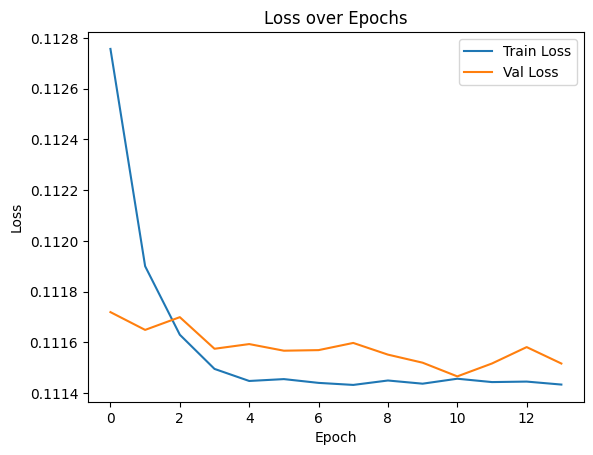

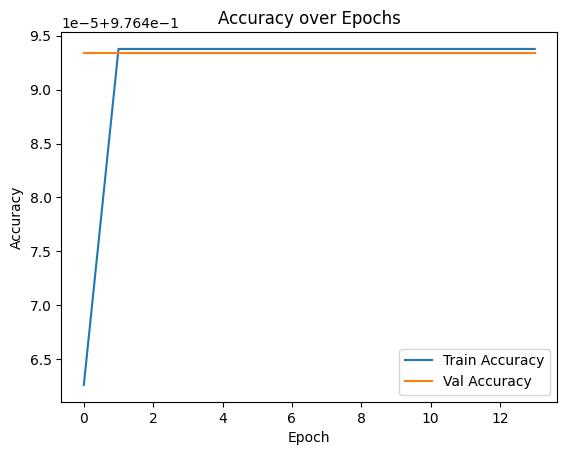

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##lưu mô hình

In [ ]:
model.save("lstm_iot_attack_model.h5")
print("✅ Mô hình đã được lưu.")